In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv("data_classification_before_smote.csv")

In [3]:
data = data.drop(['ArrTime', 'Unnamed: 0'], axis = 1)

In [4]:
X = data.drop(['ArrDel15'], axis = 1)
Y = data['ArrDel15']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [6]:
print("Number of samples in X:", X.shape[0])
print("Number of samples in Y:", Y.shape[0])

Number of samples in X: 1832252
Number of samples in Y: 1832252


**Classifier before Class Balance**

**Linear Regression**

In [7]:
lr_model = LogisticRegression(max_iter = 3000)
lr_model.fit(X_train, Y_train.values.ravel())
Y_pred_lr = lr_model.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print("Accuracy for Logistic Regression:",accuracy_lr)
print()
predict_prob = lr_model.predict_proba(X_test)
print("Predicted Probability:",predict_prob)

Accuracy for Logistic Regression: 0.9159268369002831

Predicted Probability: [[1.70833056e-06 9.99998292e-01]
 [8.89104158e-02 9.11089584e-01]
 [8.65372567e-05 9.99913463e-01]
 ...
 [9.49931559e-01 5.00684412e-02]
 [8.84968937e-01 1.15031063e-01]
 [9.56305813e-01 4.36941874e-02]]


**Decision Trees**

In [9]:
dt_model = DecisionTreeClassifier(max_depth = 8)
dt_model.fit(X_train, Y_train.values.ravel())
Y_pred_dt = dt_model.predict(X_test)

In [10]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.9162743143233468


**Extra Trees Classifier**

In [11]:
et_model = ExtraTreesClassifier()
et_model.fit(X_train, Y_train.values.ravel())
Y_pred_et = et_model.predict(X_test)

In [12]:
accuracy_et = accuracy_score(Y_test, Y_pred_et)
print(f"Extra Trees Classifier Accuracy: {accuracy_et}")

Extra Trees Classifier Accuracy: 0.9112458975833037


**XG Boost Classifier**

In [13]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train.values.ravel())
Y_pred_xgb = xgb_model.predict(X_test)

In [14]:
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.9194416347084464


**Random Forest**

In [15]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train.values.ravel())
Y_pred_rf = rf_model.predict(X_test)

In [16]:
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.916769151281846


**SMOTE FOR CLASS IMBALANCE**

In [17]:
counts = data['ArrDel15'].value_counts()
counts

ArrDel15
0.0    1448082
1.0     384170
Name: count, dtype: int64

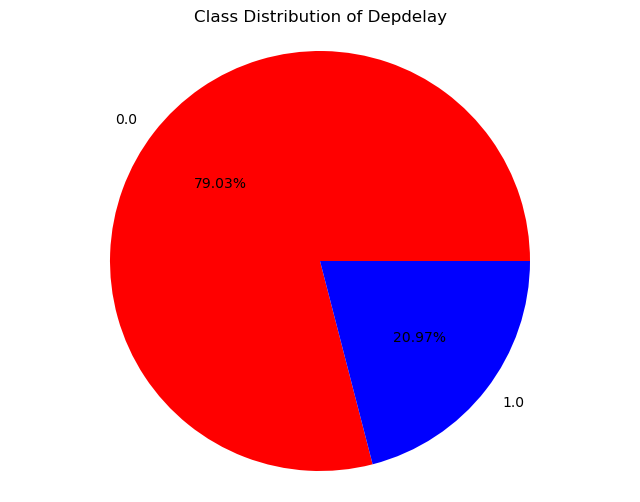

In [18]:
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.2f%%', colors=['red', 'blue'])
plt.title('Class Distribution of Depdelay')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [19]:
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [20]:
train_data_smote = pd.concat([X_train, Y_train], axis = 1)

In [21]:
train_data_smote.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'CRSArrTime', 'rounded_CRSDepTime', 'WindSpeedKmph',
       'WindDirDegree', 'WeatherCode', 'precipMM', 'Visibilty', 'Pressure',
       'Cloudcover', 'WindChillF', 'Humidity', 'ArrDel15'],
      dtype='object')

In [22]:
new_counts = train_data_smote['ArrDel15'].value_counts()
new_counts

ArrDel15
1.0    1013626
0.0    1013626
Name: count, dtype: int64

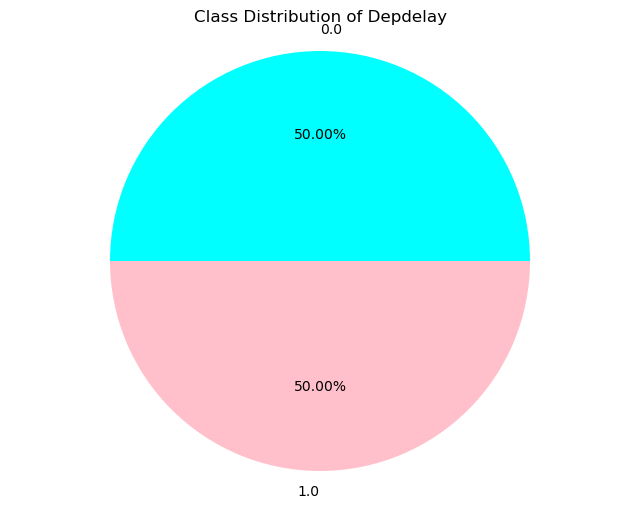

In [23]:
plt.figure(figsize=(8, 6))
plt.pie(new_counts, labels=counts.index, autopct='%1.2f%%', colors=['cyan', 'pink'])
plt.title('Class Distribution of Depdelay')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Logistic Regression**

In [24]:
lr_model = LogisticRegression(max_iter = 3000)
lr_model.fit(X_train, Y_train.values.ravel())
Y_pred_lr = lr_model.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print("Accuracy for Logistic Regression:",accuracy_lr)
print()
predict_prob = lr_model.predict_proba(X_test)
print("Predicted Probability:",predict_prob)

Accuracy for Logistic Regression: 0.895729484278011

Predicted Probability: [[5.25942657e-08 9.99999947e-01]
 [1.39947259e-02 9.86005274e-01]
 [5.53332259e-06 9.99994467e-01]
 ...
 [8.71715573e-01 1.28284427e-01]
 [6.77435995e-01 3.22564005e-01]
 [8.81164852e-01 1.18835148e-01]]


# Decision Trees

In [26]:
dt_model = DecisionTreeClassifier(max_depth = 8)
dt_model.fit(X_train, Y_train.values.ravel())
Y_pred_dt = dt_model.predict(X_test)

In [27]:
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.9052187106586426


# Extra Trees Classifier

In [28]:
et_model = ExtraTreesClassifier()
et_model.fit(X_train, Y_train.values.ravel())
Y_pred_et = et_model.predict(X_test)

In [29]:
accuracy_et = accuracy_score(Y_test, Y_pred_et)
print(f"Extra Trees Classifier Accuracy: {accuracy_et}")

Extra Trees Classifier Accuracy: 0.905622584940947


# XGBoost

In [30]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train.values.ravel())
Y_pred_xgb = xgb_model.predict(X_test)

In [31]:
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.9131488367692968


# Random Forest

In [32]:
'''
bootstrapping
    -(creating new datasets in random by replacement using the given datasets, perform decision tree on each) 
    -ensures we are not using same data for each tree
                    + 
aggregating (take the majority of the output from each decision tree)
'''

'\nbootstrapping\n    -(creating new datasets in random by replacement using the given datasets, perform decision tree on each) \n    -ensures we are not using same data for each tree\n                    + \naggregating (take the majority of the output from each decision tree)\n'

In [33]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train.values.ravel())
Y_pred_rf = rf_model.predict(X_test)

In [34]:
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.9083314534380253
